<a href="https://colab.research.google.com/github/Keishin315/sony_compe/blob/main/lgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#baselineモデルLB4043

In [ ]:
!pip install optuna
#予測していく
import optuna.integration.lightgbm as olgb
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
traindata=pd.read_csv('/content/drive/MyDrive/traindata.csv')
testdata=pd.read_csv('/content/drive/MyDrive/testdata.csv')
toriginal=pd.read_csv('/content/drive/MyDrive/toroginal.csv')
original=pd.read_csv('/content/drive/MyDrive/original.csv')
target=pd.read_csv('/content/drive/MyDrive/target.csv')
stcapa=pd.read_csv('/content/drive/MyDrive/stcapa.csv')
tstcapa=pd.read_csv('/content/drive/MyDrive/tstcapa.csv')

In [3]:
#なんか変なパラメータでやった時の検証スコア

train_x, test_x, train_y, test_y = train_test_split(traindata, target, test_size=0.15,shuffle=False)
import lightgbm as lgb
prediction = [ 0 for i in range(len(test_y))]
for i in range(20):
  gbm = lgb.LGBMRegressor(n_estimators=50,
                            n_jobs=-1,
                            num_leaves=int(2**6.18),
                            feature_fraction=.63,
                            lambda_l1=10**-2.68,
                            lambda_l2=10**-2.67,
                            min_data_in_leaf=3,
                            learning_rate=10**-1.46,
                            num_boost_round=1000,
                            random_state=2000+i)
  gbm.fit(train_x,train_y)
  prediction+=gbm.predict(test_x)/20

test_y2=pd.DataFrame(test_y.values).copy()
prediction1=pd.DataFrame(prediction).copy()
for i in range(505):
  test_y2[0][i]=test_y2[0][i]*stcapa['0'][len(traindata)-505+i]
  prediction1[0][i]=prediction1[0][i]*stcapa['0'][len(traindata)-505+i]
np.sqrt(mean_squared_error(test_y2,prediction1))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


3684.8587067352582

In [5]:
import lightgbm as lgb
pre = [ 0 for i in range(len(testdata))]
for i in range(30):
  gbm = lgb.LGBMRegressor(n_estimators=50,
                            n_jobs=-1,
                            num_leaves=int(2**6.18),
                            feature_fraction=.63,
                            lambda_l1=10**-2.68,
                            lambda_l2=10**-2.67,
                            min_data_in_leaf=3,
                            learning_rate=10**-1.46,
                            num_boost_round=1000,
                            random_state=42+i)
  gbm.fit(traindata,target)
  pre+=gbm.predict(testdata)/30



/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [6]:
pre=pd.DataFrame(pre)
for i in range(459):
  pre[0][i]=pre[0][i]*tstcapa['0'][i]
pre

,0
0,44564.391016
1,17072.607307
2,23701.392127
3,17983.307907
4,18989.056232
...,...
454,27053.262156
455,19992.032252
456,26865.726471
457,30784.593246


In [7]:
samsubdata=pd.read_csv('sample_submit-4.csv',header=None)
samsubdata.iloc[:,1]=0
samsubdata[1]=pd.DataFrame(pd.DataFrame(pre))
naga=pd.DataFrame(list(toriginal[toriginal['venue']=='トランスコスモススタジアム長崎'].id))
for i in range(459):
  if(samsubdata[0][i] in naga[0].values):
    samsubdata[1][i]=10200
samsubdata.to_csv('sub1.csv',index=False,header=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
cols = list(traindata.columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(booster.feature_importance()) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

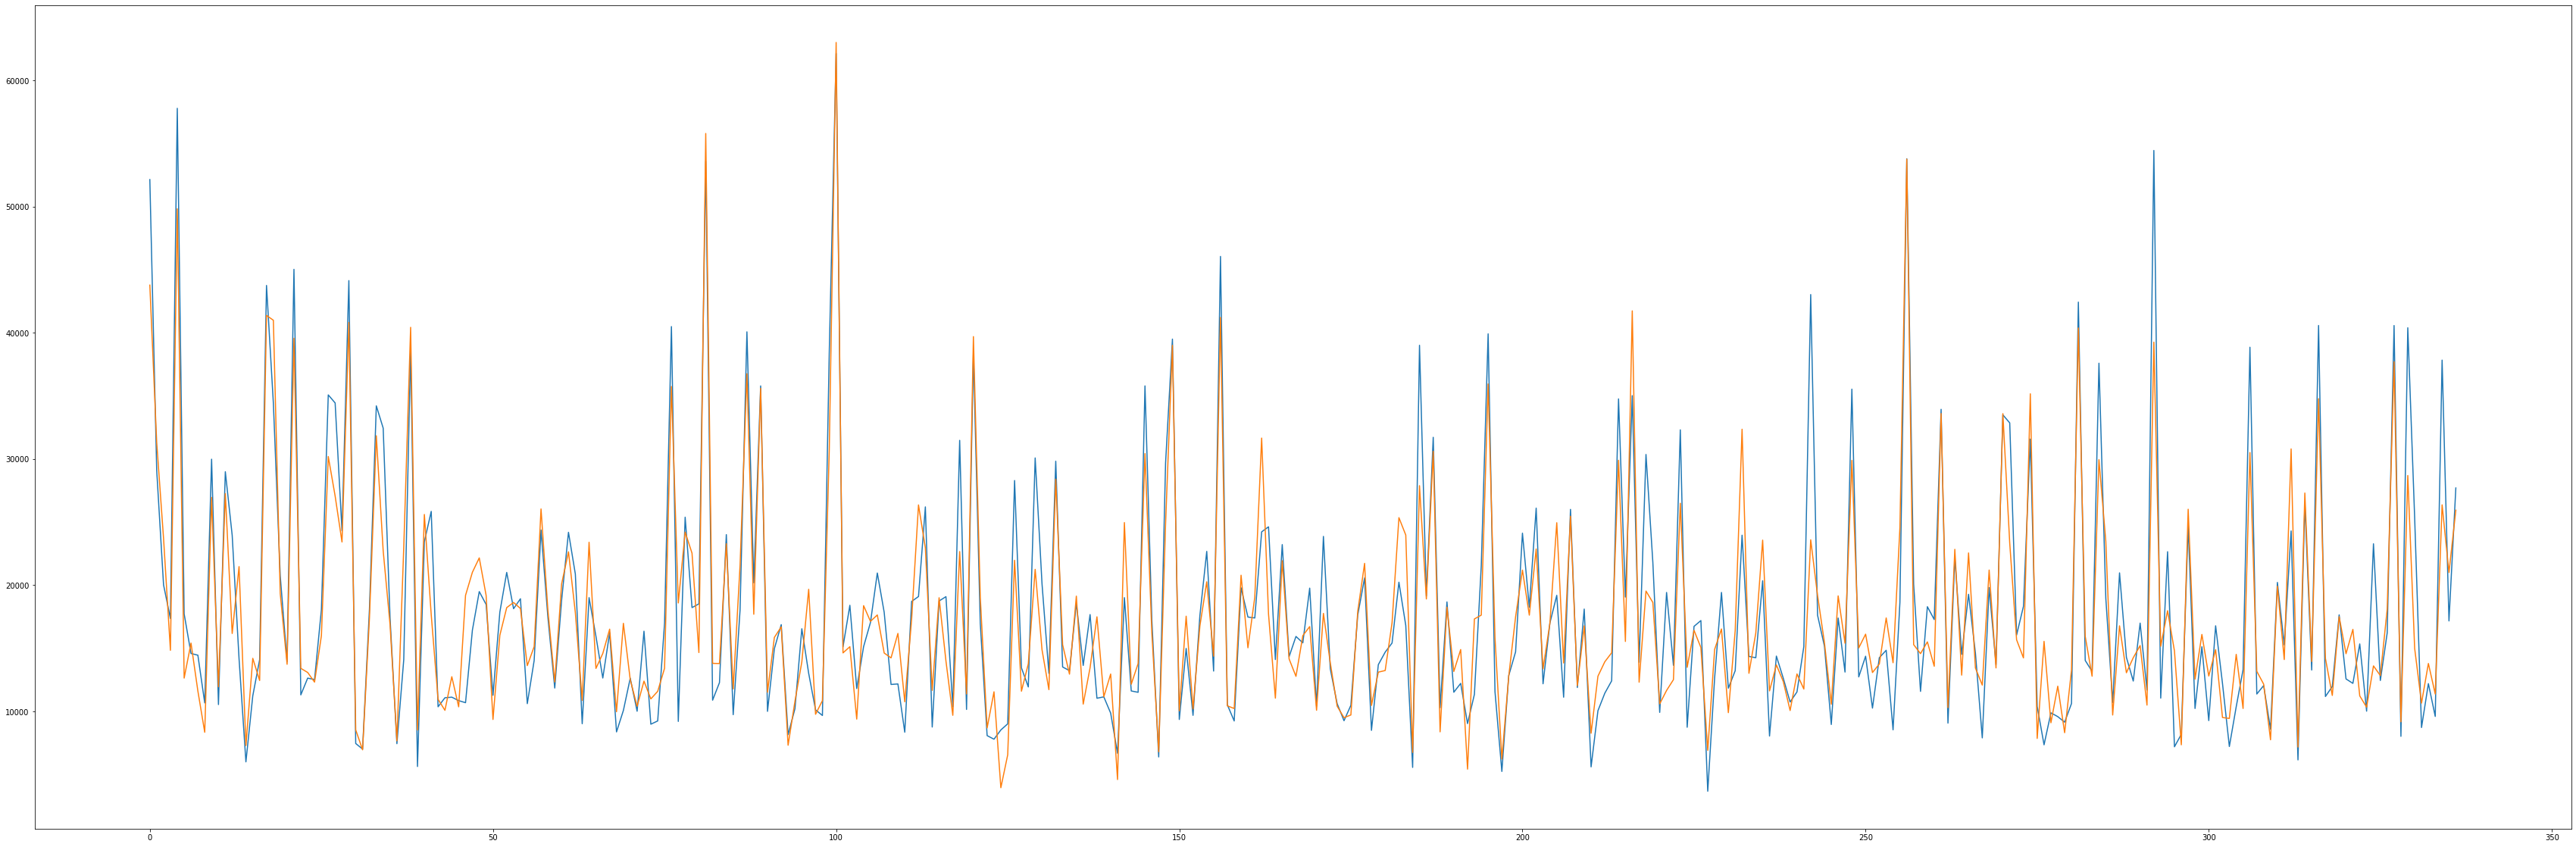

In [ ]:
plt.figure(figsize=(60,20))
plt.plot(test_y2)

plt.plot(prediction)

In [ ]:
s=[]
t=[]
count=0
for i in range(len(traindata)-1):
  if(traindata.loc[i]['match_date'].year != traindata.loc[i+1]['match_date'].year):
    s.append(count)
    t.append(traindata.loc[i]['match_date'].year)
    count=0
  else:
    count+=traindata.loc[i]['attendance']


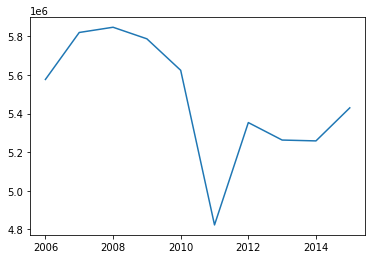

In [ ]:
plt.plot(t,s)

In [ ]:
#2011年のattendanceが激減しているー＞東日本大震災？

In [ ]:
count=0
for i in range(len(traindata)-1):
    if(traindata.loc[i]['match_date'].year == 2011):
      count+=traindata.loc[i].attendance

count

4833782

In [ ]:
for i in range(len(traindata)):
  if(traindata.loc[i]['homescore']>traindata.loc[i]['awayscore']):
    traindata.loc[i]['result']=3
  elif(traindata['homescore']<traindata['homescore'])

SyntaxError: ignored

In [ ]:
traindata['venue'].value_counts()

埼玉スタジアム2002                 192
県立カシマサッカースタジアム              187
等々力陸上競技場                    186
味の素スタジアム                    169
日産スタジアム                     160
万博記念競技場                     149
日立柏サッカー場                    138
NACK5スタジアム大宮                126
ヤマハスタジアム(磐田)                126
東北電力ビッグスワンスタジアム             119
ユアテックスタジアム仙台                115
広島ビッグアーチ                    101
ホームズスタジアム神戸                  93
名古屋市瑞穂陸上競技場                  89
豊田スタジアム                      82
ベストアメニティスタジアム                82
山梨中銀スタジアム                    81
エディオンスタジアム広島                 68
NDソフトスタジアム山形                 68
フクダ電子アリーナ                    68
京都市西京極総合運動公園陸上競技場兼球技場        66
九州石油ドーム                      65
アウトソーシングスタジアム日本平             64
ShonanBMWスタジアム平塚             51
デンカビッグスワンスタジアム               50
IAIスタジアム日本平                  48
日本平スタジアム                     48
ノエビアスタジアム神戸                  47
キンチョウスタジアム                   44
大阪長居スタジアム                    41
国立競技場                        40
レベルファイブス

In [ ]:
trainX=traindata

In [ ]:
import re
traindata['month']=0
traindata['year']=0
traindata['day']=0
traindata['hour']=0
traindata['weekday']=0
for i in range(len(traindata)):
  traindata['month'][i]=traindata.loc[i]['match_date'].month
  traindata['year'][i]=traindata.loc[i]['match_date'].year
  traindata['day'][i]=traindata.loc[i]['match_date'].day
  traindata['hour'][i]=traindata.loc[i]['kick_off_time'].hour
  traindata['weekday'][i]=traindata.loc[i]['match_date'].weekday()
  traindata['section'][i]=int(re.split('第|節',traindata['section'][i])[1])
  traindata['round'][i]=int(re.split('第|日',traindata['round'][i])[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

In [ ]:
flag=0
for i in range(len(traindata)-1):
  
  if(traindata['section'][i]==17 and traindata['section'][i+1]==1 and flag==0):
    flag=1
  elif(traindata['section'][i]==17 and traindata['section'][i+1]==1 and flag==1):
    flag=0
    traindata['section'][i]+=17
  if(flag):
    traindata['section'][i]+=17
  
traindata['section'][3365]+=17

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
traindata

,id,match_date,kick_off_time,section,round,home_team,away_team,venue,weather,temperature,humidity,broadcasters,attendance,homescore,awayscore,month,year,day,hour,weekday
0,9190,2006-03-04,2022-07-04 16:04:00,1,1,G大阪,浦和,万博記念競技場,晴,8.3,40,NHK総合/J SPORTS(録),20916,1,1,3,2006,4,16,5
1,9191,2006-03-05,2022-07-04 13:00:00,1,2,甲府,清水,山梨県小瀬スポーツ公園陸上競技場,晴,12.9,28,山梨放送/テレビ静岡(録)/J SPORTS(録),14277,0,2,3,2006,5,13,6
2,9192,2006-03-05,2022-07-04 13:35:00,1,2,FC東京,大分,味の素スタジアム,晴,12.1,35,BS-i/MXテレビ(録)/J SPORTS(録),22531,2,0,3,2006,5,13,6
3,9193,2006-03-05,2022-07-04 14:04:00,1,2,磐田,福岡,静岡スタジアムエコパ,晴,11.6,42,J SPORTS,28564,1,1,3,2006,5,14,6
4,9194,2006-03-05,2022-07-04 14:04:00,1,2,名古屋,C大阪,名古屋市瑞穂陸上競技場,晴,13.1,32,スカイパーフェクTV!/NHK名古屋(録)/NHK大阪(録)/J SPORTS(録),17199,3,2,3,2006,5,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,18195,2016-11-03,2022-07-04 13:33:00,34,1,川崎F,G大阪,等々力陸上競技場,晴,20.0,41,スカパー!/スカパー!プレミアムサービス/NHK BS1,25694,2,3,11,2016,3,13,3
3362,18196,2016-11-03,2022-07-04 13:33:00,34,1,甲府,鳥栖,山梨中銀スタジアム,晴,20.5,20,スカパー!/スカパー!プレミアムサービス,14676,0,1,11,2016,3,13,3
3363,18197,2016-11-03,2022-07-04 13:33:00,34,1,新潟,広島,デンカビッグスワンスタジアム,曇のち雨のち晴,18.2,33,スカパー!/スカパー!プレミアムサービス/NHK新潟/NHK広島,27081,0,1,11,2016,3,13,3
3364,18198,2016-11-03,2022-07-04 13:33:00,34,1,名古屋,湘南,パロマ瑞穂スタジアム,晴,17.0,41,スカパー!/スカパー!プレミアムサービス/NHK名古屋,18474,1,3,11,2016,3,13,3


In [ ]:
import re
re.split('第|節','第15節')[1]

'15'